In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tp=pd.read_csv("tp.csv",encoding='utf-8',)

In [3]:
tp.head(2)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None


In [4]:
tp.rename(columns={"Pricing, Delivery_Terms_Quote_Appr":"Pri_Deli_Terms_Quote_Appr",\
                  "Pricing, Delivery_Terms_Approved":"Pri_Deli_Terms_Appr"},inplace=True)

In [5]:
tp.Stage.value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

Analizo el tipo de venta que se producjo por territorio

In [6]:
terr_stage=tp[["Territory","Stage"]].groupby(["Territory","Stage"]).agg({"Stage":"count"})

In [7]:
terr_stage.head(1)

,,Stage
Territory,Stage,
Albania,Closed Lost,2


In [8]:
terr_stage.columns={"cantidad_ventas_por_territorio"}

In [9]:
terr_stage.reset_index(inplace=True)

Cantidad de ventas completadas por territorio

In [10]:
aprob_por_ter=terr_stage.loc[terr_stage.Stage.str.contains("Closed Won")].sort_values("cantidad_ventas_por_territorio",ascending=False)

In [11]:
aprob_por_ter=aprob_por_ter[["Territory","cantidad_ventas_por_territorio"]]

In [12]:
aprob_por_ter.rename(columns={"cantidad_ventas_por_territorio":"cant_ventas_aprob_por_ter"},inplace=True)

In [13]:
aprob_por_ter.head(2)

,Territory,cant_ventas_aprob_por_ter
87,None,3034
39,Germany,1023


<AxesSubplot:xlabel='Territory'>

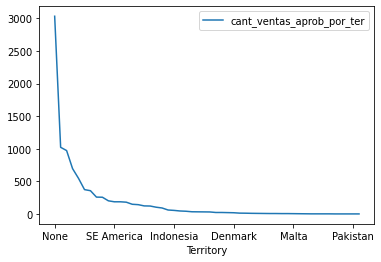

In [14]:
aprob_por_ter.plot(x="Territory",y="cant_ventas_aprob_por_ter")

Cantidad de ventas perdidas por territorio

In [15]:
lost_por_ter=terr_stage.loc[terr_stage.Stage.str.contains("Closed Lost")].sort_values("cantidad_ventas_por_territorio",ascending=False)#.loc[:,["Territory","cantidad_ventas_perdidas_por_territorio"]]

In [16]:
lost_por_ter=lost_por_ter[["Territory","cantidad_ventas_por_territorio"]]

In [17]:
lost_por_ter.rename(columns={"cantidad_ventas_por_territorio":"cantidad_ventas_perdidas_por_territorio"},inplace=True)

In [18]:
perdi_gana=lost_por_ter.merge(aprob_por_ter,on="Territory")

In [19]:
perdi_gana=perdi_gana.set_index("Territory")
#pd.DataFrame({"va":perdi_gana["cant_ventas_aprob_por_ter"],"vp":perdi_gana["cantidad_ventas_perdidas_por_territorio"]},index=perdi_gana["Territory"])

<AxesSubplot:xlabel='Territory'>

<Figure size 7200x4320 with 0 Axes>

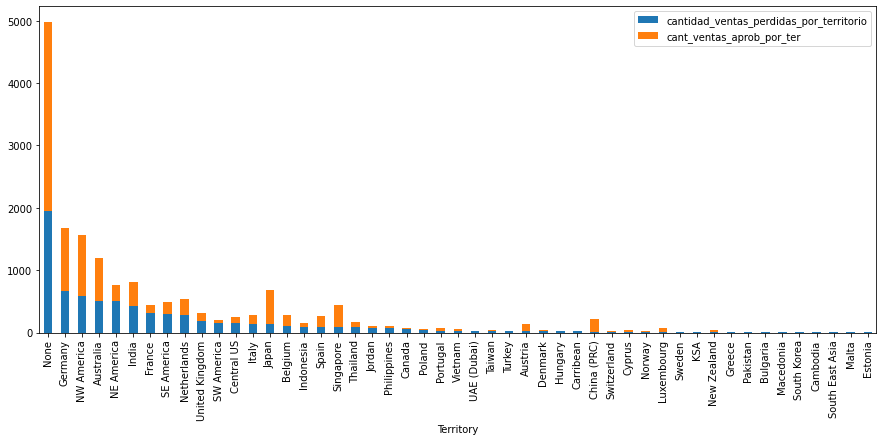

In [20]:
plt.figure(figsize=(100,60))
plt.rcParams["figure.figsize"]=[15,6]
perdi_gana.plot(kind="bar",stacked=True)
#perdi_gana.head(20).plot.bar(rot=0,stacked=True)

In [21]:
tp.head(2)

,ID,Region,Territory,Pri_Deli_Terms_Quote_Appr,Pri_Deli_Terms_Appr,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None


In [22]:
pri_PG=tp[["Territory","Stage","Pri_Deli_Terms_Quote_Appr","Pri_Deli_Terms_Appr"]]

In [23]:
pri_PG.head(2)

,Territory,Stage,Pri_Deli_Terms_Quote_Appr,Pri_Deli_Terms_Appr
0,None,Closed Lost,1,1
1,None,Closed Won,0,0


In [24]:
pri_PG=pri_PG.loc[(pri_PG.Stage.str.contains("Closed Lost")) | (pri_PG.Stage.str.contains("Closed Won"))]

In [25]:
pri_PG_count=pri_PG.groupby(["Territory","Stage","Pri_Deli_Terms_Quote_Appr","Pri_Deli_Terms_Appr"]).\
agg({"Pri_Deli_Terms_Quote_Appr":"count","Pri_Deli_Terms_Appr":"count"})

In [26]:
pri_PG_count.rename(columns={"Pri_Deli_Terms_Quote_Appr":"cant_res",\
                   "Pri_Deli_Terms_Appr":"cant_res2"},inplace=True)

In [27]:
pri_PG_count.reset_index(inplace=True)

In [28]:
pri_PG_count_=pri_PG_count.sort_values("cant_res",ascending=False)

In [29]:
pri_PG_count_.loc[pri_PG_count_.Stage.str.contains("Closed Lost")].head(20)

,Territory,Stage,Pri_Deli_Terms_Quote_Appr,Pri_Deli_Terms_Appr,cant_res,cant_res2
170,None,Closed Lost,1,0,1387,1387
171,None,Closed Lost,1,1,434,434
81,Germany,Closed Lost,1,1,381,381
148,NE America,Closed Lost,1,1,343,343
4,Australia,Closed Lost,1,1,304,304
154,NW America,Closed Lost,1,1,275,275
153,NW America,Closed Lost,1,0,210,210
95,India,Closed Lost,1,1,203,203
160,Netherlands,Closed Lost,1,1,176,176
80,Germany,Closed Lost,1,0,163,163


In [30]:
pri_PG_count_.loc[pri_PG_count_.Stage.str.contains("Closed Won")].head(20)

,Territory,Stage,Pri_Deli_Terms_Quote_Appr,Pri_Deli_Terms_Appr,cant_res,cant_res2
174,None,Closed Won,1,1,2786,2786
84,Germany,Closed Won,1,1,566,566
157,NW America,Closed Won,1,1,522,522
119,Japan,Closed Won,1,1,423,423
7,Australia,Closed Won,1,1,332,332
155,NW America,Closed Won,0,0,300,300
82,Germany,Closed Won,0,0,269,269
5,Australia,Closed Won,0,0,241,241
98,India,Closed Won,1,1,210,210
83,Germany,Closed Won,1,0,188,188


In [31]:
pri_PG_count__pt=pri_PG_count_.pivot_table(index="Territory",columns="Stage",values="cant_res")

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='Stage', ylabel='Territory'>

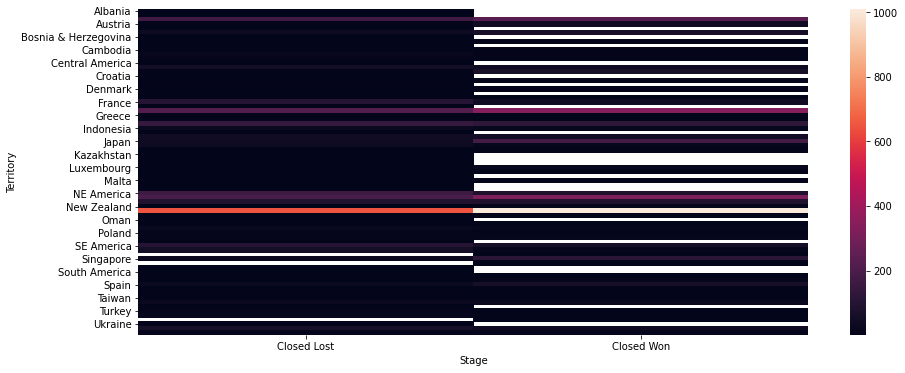

In [40]:
sns.heatmap(pri_PG_count__pt)

In [34]:
tp["count"]=1

In [44]:
p1=tp.pivot_table(index="Stage",columns="Pri_Deli_Terms_Quote_Appr",values="count",aggfunc="sum")

In [45]:
p1

Pri_Deli_Terms_Quote_Appr,0,1
Stage,,
Closed Lost,1136.0,6214.0
Closed Won,2118.0,7415.0
Negotiation,NaN,18.0
Proposal,NaN,35.0
Qualification,NaN,11.0


In [46]:
p2=tp.pivot_table(index="Stage",columns="Bureaucratic_Code",values="count",aggfunc="sum")

In [47]:
p2

Bureaucratic_Code,Bureaucratic_Code_0,Bureaucratic_Code_1,Bureaucratic_Code_2,Bureaucratic_Code_3,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_6
Stage,,,,,,,
Closed Lost,NaN,159.0,128.0,1.0,4291.0,2771.0,NaN
Closed Won,51.0,102.0,114.0,1.0,8253.0,1011.0,1.0
Negotiation,NaN,NaN,NaN,NaN,17.0,1.0,NaN
Proposal,NaN,NaN,NaN,NaN,26.0,9.0,NaN
Qualification,NaN,NaN,NaN,NaN,NaN,11.0,NaN


In [48]:
p3=tp.pivot_table(index="Account_Name",columns="Stage",values="count",aggfunc="sum")

In [49]:
p3.loc[p3["Closed Won"]>100]

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Account_Name,,,,,
Account_Name_1274,20.0,124.0,NaN,NaN,NaN
Account_Name_1440,50.0,267.0,NaN,NaN,NaN
Account_Name_1508,31.0,323.0,NaN,NaN,1.0
Account_Name_1642,193.0,204.0,NaN,NaN,NaN
Account_Name_1693,7.0,118.0,NaN,NaN,NaN
Account_Name_1836,91.0,795.0,NaN,NaN,NaN
Account_Name_1888,1104.0,1018.0,NaN,NaN,2.0
Account_Name_1991,66.0,520.0,NaN,NaN,NaN
Account_Name_1994,13.0,139.0,NaN,NaN,NaN


In [53]:
mejores_vendedores=p3.loc[(p3["Closed Lost"]<100)&(p3["Closed Won"]>250)].reset_index()

In [54]:
mejores_vendedores

Stage,Account_Name,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,Account_Name_1440,50.0,267.0,NaN,NaN,NaN
1,Account_Name_1508,31.0,323.0,NaN,NaN,1.0
2,Account_Name_1836,91.0,795.0,NaN,NaN,NaN
3,Account_Name_1991,66.0,520.0,NaN,NaN,NaN


In [56]:
mejores_vendedores_pais=mejores_vendedores.merge(tp,on="Account_Name",how="left")

In [63]:
mejores_vendedores_pais

,Account_Name,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,ID,Region,Territory,Pri_Deli_Terms_Quote_Appr,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,count
0,Account_Name_1440,50.0,267.0,NaN,NaN,NaN,17338,APAC,Australia,1,...,2017,NaT,0,AUD,117600.0,AUD,117600.0,Closed Won,Prod_Category_A_None,1
1,Account_Name_1440,50.0,267.0,NaN,NaN,NaN,17455,APAC,Australia,1,...,2017,NaT,0,AUD,117600.0,AUD,117600.0,Closed Won,Prod_Category_A_None,1
2,Account_Name_1440,50.0,267.0,NaN,NaN,NaN,17505,APAC,Australia,1,...,2017,NaT,0,AUD,117600.0,AUD,117600.0,Closed Won,Prod_Category_A_None,1
3,Account_Name_1440,50.0,267.0,NaN,NaN,NaN,17464,APAC,Australia,1,...,2017,NaT,0,AUD,117600.0,AUD,117600.0,Closed Won,Prod_Category_A_None,1
4,Account_Name_1440,50.0,267.0,NaN,NaN,NaN,17468,APAC,Australia,1,...,2017,NaT,0,AUD,105840.0,AUD,105840.0,Closed Won,Prod_Category_A_None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,Account_Name_1991,66.0,520.0,NaN,NaN,NaN,21406,Japan,Japan,1,...,2019,NaT,0,JPY,2789800.0,JPY,6479070.0,Closed Won,Prod_Category_A_None,1
2140,Account_Name_1991,66.0,520.0,NaN,NaN,NaN,21409,Japan,Japan,1,...,2019,NaT,0,JPY,3689270.0,JPY,6479070.0,Closed Won,Prod_Category_A_None,1
2141,Account_Name_1991,66.0,520.0,NaN,NaN,NaN,22652,Japan,Japan,1,...,2019,NaT,0,JPY,1071840.0,JPY,1071840.0,Closed Won,Prod_Category_A_None,1
2142,Account_Name_1991,66.0,520.0,NaN,NaN,NaN,22158,Japan,None,1,...,2016,NaT,0,JPY,16354000.0,JPY,24590500.0,Closed Won,Prod_Category_A_None,1


In [64]:
mejores_vendedores_pais.groupby(["Account_Name","Stage","Region"]).agg({"Territory":"count"})

Territory
Account_Name      Stage         Region           
Account_Name_1440 Closed Lost   APAC           50
                  Closed Won    APAC          267
Account_Name_1508 Closed Lost   Japan          31
                  Closed Won    Japan         323
                  Qualification Japan           1
Account_Name_1836 Closed Lost   Japan          91
                  Closed Won    Japan         795
Account_Name_1991 Closed Lost   Japan          66
                  Closed Won    Japan         520

In [65]:
acco_terr=mejores_vendedores_pais.pivot_table(index="Account_Name",columns="Region",values="count",aggfunc="sum")

In [66]:
acco_terr

Region,APAC,Japan
Account_Name,,
Account_Name_1440,317.0,NaN
Account_Name_1508,NaN,355.0
Account_Name_1836,NaN,886.0
Account_Name_1991,NaN,586.0


<AxesSubplot:xlabel='Region', ylabel='Account_Name'>

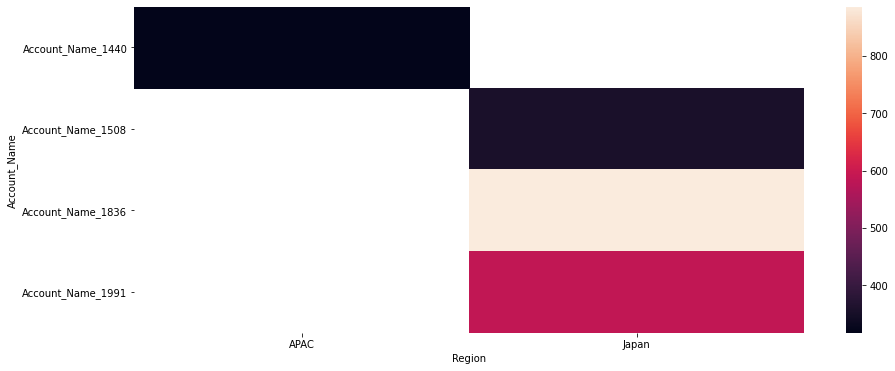

In [67]:
sns.heatmap(acco_terr)